<a href="https://colab.research.google.com/github/weasel-codes/anomaly-detection-iot/blob/main/anomaly_detection_preprocess_and_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anomaly Detection on loT Network Intrusion Using Machine Learning**

**WORK DONE BY : Nitin Sharma - 202IT017**

## Data Pre-processing 2 : Data tuning on extracted information
* Add binary class columns : Normal and Attack
* Perform data tuning to remove nan records.
* Export the data-frame into one big csv

## Model Creation : Create following models 
* Logistic Regression
* K Nearest Neighbors
* Random Forest
* Decision Tree (My Contribution)
* Naive Bayes (My Contribution)
* Artificial Neural Network (My Contribution)
* SVM

## Training Models and Testing Models

## Model performance comparison : Metrics for comparison
* Accuracy
* F1 score
* Recall

##Performance Tuning of models


# Library Imports

In [ ]:
import os
import glob
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, f1_score

# Database Import

In [ ]:
base_url = '/content/drive/MyDrive/ML/anomaly/'
data_file = 'dataset.csv'

In [ ]:
df = pd.read_csv(base_url+data_file)
if df.shape[1] > 8 :
  df = df.drop(columns=df.columns[0])

df = df[:5000]
df

,frame.number,frame.time_relative,frame.len,data.len,ip.src,ip.dst,frame.protocols,label
0,88211,70.949809,1514,NaN,104.74.213.186,192.168.0.24,eth:ethertype:ip:tcp,0
1,58708,132.842376,54,NaN,192.168.0.19,173.194.49.203,eth:ethertype:ip:tcp,0
2,131894,296.013317,66,NaN,192.168.0.16,192.168.0.13,eth:ethertype:ip:tcp,0
3,252744,49.393385,74,32.0,192.168.0.24,210.89.164.90,eth:ethertype:ip:udp:data,1
4,35069,66.823389,1502,NaN,192.168.0.13,192.168.0.16,eth:ethertype:ip:tcp,0
...,...,...,...,...,...,...,...,...
4995,23225,208.464741,114,NaN,192.168.0.16,192.168.0.13,eth:ethertype:ip:tcp,0
4996,100953,117.434516,992,934.0,192.168.0.13,163.152.127.193,eth:ethertype:ip:udp:udt:data,0
4997,58647,118.339898,60,18.0,192.168.0.13,210.89.164.90,eth:ethertype:ip:udp:data,1
4998,98341,211.286852,1472,1414.0,192.168.0.13,192.168.0.16,eth:ethertype:ip:udp:udt:data,0


# Data Pre-processing

In [ ]:
df.isna().sum()

frame.number              0
frame.time_relative       0
frame.len                 0
data.len               2629
ip.src                   20
ip.dst                   20
frame.protocols           0
label                     0
dtype: int64

In [ ]:
df['data.len'] = df['data.len'].fillna(0)
df = df.dropna()
# df['ip.src'] = df['ip.src'].fillna(method='ffill')
# df['ip.dst'] = df['ip.dst'].fillna(method='ffill')
df.isna().sum()

frame.number           0
frame.time_relative    0
frame.len              0
data.len               0
ip.src                 0
ip.dst                 0
frame.protocols        0
label                  0
dtype: int64

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['ip.src']= label_encoder.fit_transform(df['ip.src'])
df['ip.dst']= label_encoder.fit_transform(df['ip.dst'])
df[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,frame.number,frame.time_relative,frame.len,data.len,ip.src,ip.dst,frame.protocols,label
0,88211,70.949809,1514,0.0,6,102,eth:ethertype:ip:tcp,0
1,58708,132.842376,54,0.0,109,92,eth:ethertype:ip:tcp,0
2,131894,296.013317,66,0.0,108,97,eth:ethertype:ip:tcp,0
3,252744,49.393385,74,32.0,111,105,eth:ethertype:ip:udp:data,1
4,35069,66.823389,1502,0.0,105,100,eth:ethertype:ip:tcp,0


In [ ]:
# Create Entites using indexes of csv
X = df.iloc[:, :-1].values #All the rows + all the columns except last
Y = df.iloc[:,-1] #Dependent vairables is last column
X.shape, Y.shape

((4980, 7), (4980,))

In [ ]:
for i in range(X.shape[0]):
  var = X[i][6].split(':')
  print(var)
  temp = ""
  if len(var) == 1 :
    X = np.delete(X, i, 0)
  elif len(var) == 2 :
    temp = temp + var[0] + ":" + var[1]
  elif len(var) == 3 :
    temp = temp + var[0] + ":" + var[1] + ":" + var[2]
  else :
    temp = temp + var[0] + ":" + var[1] + ":" + var[2] + ":" + var[3]

  X[i][6] = temp
  print(i , " : ", X[i][6])

Streaming output truncated to the last 5000 lines.
['eth', 'ethertype', 'ip', 'tcp']
2480  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'udp', 'data']
2481  :  eth:ethertype:ip:udp
['eth', 'ethertype', 'ip', 'tcp', 'data']
2482  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'tcp', 'ssl']
2483  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'udp', 'udt', 'data']
2484  :  eth:ethertype:ip:udp
['eth', 'ethertype', 'ip', 'tcp']
2485  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'udp', 'data']
2486  :  eth:ethertype:ip:udp
['eth', 'ethertype', 'ip', 'tcp', 'data']
2487  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'udp', 'data']
2488  :  eth:ethertype:ip:udp
['eth', 'ethertype', 'ip', 'tcp']
2489  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'tcp']
2490  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'udp', 'data']
2491  :  eth:ethertype:ip:udp
['eth', 'ethertype', 'ip', 'tcp']
2492  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'udp', 'data']
2493 

In [ ]:
df = pd.DataFrame(data=X)
df[6]= label_encoder.fit_transform(df[6])
df

,0,1,2,3,4,5,6
0,88211,70.9498,1514,0,6,102,3
1,58708,132.842,54,0,109,92,3
2,131894,296.013,66,0,108,97,3
3,252744,49.3934,74,32,111,105,4
4,35069,66.8234,1502,0,105,100,3
...,...,...,...,...,...,...,...
4975,23225,208.465,114,0,108,97,3
4976,100953,117.435,992,934,105,86,4
4977,58647,118.34,60,18,105,105,4
4978,98341,211.287,1472,1414,105,100,4


In [ ]:
X = df.iloc[:, 1:].values #All the rows + all the columns except first data frame num
X

array([[70.949809, 1514, 0.0, 6, 102, 3],
       [132.842376, 54, 0.0, 109, 92, 3],
       [296.013317, 66, 0.0, 108, 97, 3],
       ...,
       [118.339898, 60, 18.0, 105, 105, 4],
       [211.286852, 1472, 1414.0, 105, 100, 4],
       [73.427971, 74, 32.0, 105, 105, 4]], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:,[0,1,2]] = sc.fit_transform(X[:,[0,1,2]])
X

array([[-0.33683085390879763, 1.7042385144345225, -0.36803731754860025,
        6, 102, 3],
       [0.5204182499610531, -0.6773712451919225, -0.36803731754860025,
        109, 92, 3],
       [2.7804334622861497, -0.6577963704552668, -0.36803731754860025,
        108, 97, 3],
       ...,
       [0.31955024800223597, -0.6675838078235947, -0.3228877075917827,
        105, 105, 4],
       [1.6069212019963115, 1.6357264528562276, 3.1787153757258433, 105,
        100, 4],
       [-0.302506826699774, -0.644746453964163, -0.2877713442920357, 105,
        105, 4]], dtype=object)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) #80:20 :: Train:Test

print("Train set for X : \n", X_train[:5])
print("\n\nTest set for X : \n", X_test[:5])
print("\n\nTrain set for Y : \n", Y_train[:5])
print("\n\nTest set for Y : \n", Y_test[:5])

Train set for X : 
 [[-0.5155855579650516 -0.6577963704552668 -0.36803731754860025 108 97 3]
 [-1.1732740732834284 -0.5990717462452997 -0.36803731754860025 105 42 3]
 [-0.646820146217888 -0.644746453964163 -0.2877713442920357 111 105 4]
 [-0.41731047749573286 -0.644746453964163 -0.2877713442920357 105 105 4]
 [-1.0236221362695965 -0.6577963704552668 -0.36803731754860025 105 86 3]]


Test set for X : 
 [[0.6558287382992801 -0.6398527352799991 -0.28024640929923283 111 105 4]
 [-0.56802900755848 -0.644746453964163 -0.2877713442920357 105 105 4]
 [-0.7271728844707482 -0.644746453964163 -0.2877713442920357 105 105 4]
 [0.5965183973638931 1.6928198375048067 -0.36803731754860025 4 102 3]
 [-0.27555739837619264 -0.644746453964163 -0.2877713442920357 111 105 4]]


Train set for Y : 
 851     0
1762    0
2996    1
2986    1
2706    0
Name: label, dtype: int64


Test set for Y : 
 4376    1
250     1
3903    1
4096    0
3006    1
Name: label, dtype: int64


# Prediction Model

In [ ]:
x_train, x_test, y_train, y_test = X_train, X_test, Y_train, Y_test

## Logistic Regression

In [ ]:
#Creating and training the Logistic Regression model
#importing LogisticRegression model from linear_model class of sklearn library
LR_classifier = LogisticRegression(random_state = 1, max_iter=1000, verbose=1)
LR_classifier.fit(X_train,Y_train)

y_pred_LR = LR_classifier.predict(x_test)
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       530
           1       0.88      0.78      0.83       466

    accuracy                           0.85       996
   macro avg       0.85      0.84      0.85       996
weighted avg       0.85      0.85      0.85       996



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [ ]:
parameters = {'penalty': ['l1','l2'], 
              'C': [0.001,0.01,0.1,1,10,100,1000],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

scoring = ['accuracy']
grid_search = GridSearchCV(estimator = LR_classifier, param_grid = parameters, return_train_score=True,  
                           scoring = scoring, refit='accuracy', cv = 10, n_jobs = -1, verbose=1)

grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("BEST Training Accuracy LR : {:.2f} %".format(best_accuracy*100))
print("BEST Training params for LR : ", best_params)
print("BEST Training estimator for LR : ", best_estimator)

Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   53.6s


[LibLinear]BEST Training Accuracy LR : 84.96 %
BEST Training params for LR :  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
BEST Training estimator for LR :  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)


[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  1.8min finished


Accuracy: 0.8493975903614458
f1_score: 0.8287671232876712
Recall : 0.778969957081545


Text(42.0, 0.5, 'Truth')

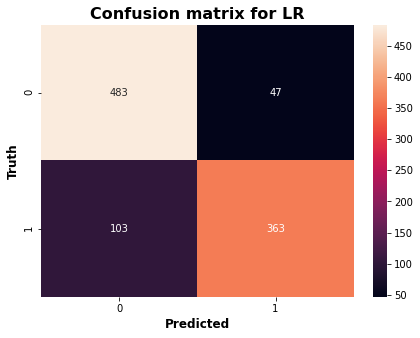

In [ ]:
y_pred_LR = best_estimator.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_LR))
print("f1_score:", metrics.f1_score(y_test, y_pred_LR))
print("Recall :", metrics.recall_score(y_test, y_pred_LR))

cm = confusion_matrix(y_test, y_pred_LR)

plt.figure(figsize = (7,5))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion matrix for LR', fontweight = 'bold', fontsize = 16)
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

## Naive Bayes

In [ ]:
clf_nb = GaussianNB()
clf_nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy: 0.820281124497992
f1_score: 0.8280499519692602
Recall : 0.924892703862661


Text(42.0, 0.5, 'Truth')

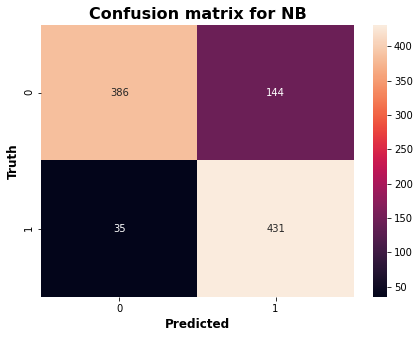

In [ ]:
y_pred_nb = clf_nb.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_nb))
print("f1_score:", metrics.f1_score(y_test, y_pred_nb))
print("Recall :", metrics.recall_score(y_test, y_pred_nb))

cm_DT = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize = (7,5))
sn.heatmap(cm_DT, annot = True, fmt = 'd')
plt.title('Confusion matrix for NB', fontweight = 'bold', fontsize = 16)
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

## K-Nearest Neighbours

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train, y_train)

y_pred_knn = knn_classifier.predict(x_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       530
           1       0.98      0.92      0.95       466

    accuracy                           0.95       996
   macro avg       0.96      0.95      0.95       996
weighted avg       0.95      0.95      0.95       996



Hyperparameter tuning

In [ ]:
parameters = {'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 
              'metric' : ['minkowski', 'euclidean', 'manhattan'],
              'weights' : ['distance', 'uniform'],
              'p' : [2]}

scoring = ['accuracy']

grid_search = GridSearchCV(estimator = knn_classifier, param_grid = parameters, 
                           return_train_score=True,  
                           scoring = scoring, refit='accuracy', 
                           cv = 10, n_jobs = -1, verbose=1)

grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("BEST Training Accuracy KNN : {:.2f} %".format(best_accuracy*100))
print("BEST Training params for KNN : ", best_params)
print("BEST Training estimator for KNN : ", best_estimator)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   42.2s


BEST Training Accuracy KNN : 94.93 %
BEST Training params for KNN :  {'metric': 'manhattan', 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
BEST Training estimator for KNN :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.1min finished


Accuracy: 0.9598393574297188
f1_score: 0.9561403508771931
recall_score: 0.9356223175965666


Text(42.0, 0.5, 'Truth')

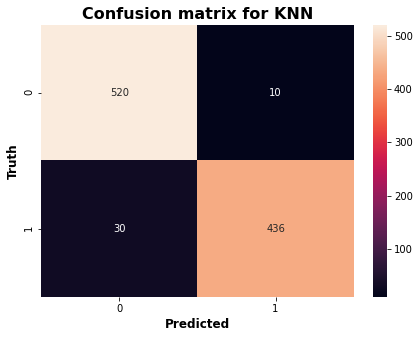

In [ ]:
y_pred_knn = best_estimator.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("f1_score:", metrics.f1_score(y_test, y_pred_knn))
print("recall_score:", metrics.recall_score(y_test, y_pred_knn))

cm_DT = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize = (7,5))
sn.heatmap(cm_DT, annot = True, fmt = 'd')
plt.title('Confusion matrix for KNN', fontweight = 'bold', fontsize = 16)
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

## Decision Tree

In [ ]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(x_train, y_train)
  
# print prediction results
y_pred_dt = dt_classifier.predict(x_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       530
           1       0.95      0.94      0.95       466

    accuracy                           0.95       996
   macro avg       0.95      0.95      0.95       996
weighted avg       0.95      0.95      0.95       996



In [ ]:
n_components = list(range(1, x_train.shape[1]+1, 1))

# Creating lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = {'criterion' : criterion, 'max_depth' : max_depth}
scoring = ['accuracy']

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=parameters, scoring=scoring, refit='accuracy', cv=10, n_jobs=-1, verbose=1)

grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("BEST Training Accuracy Decision Tree : {:.2f} %".format(best_accuracy*100))
print("BEST Training params for Decision Tree : ", best_params)
print("BEST Training estimator for Decision Tree : ", best_estimator)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


BEST Training Accuracy Decision Tree : 95.13 %
BEST Training params for Decision Tree :  {'criterion': 'entropy', 'max_depth': 8}
BEST Training estimator for Decision Tree :  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.9s finished


Accuracy: 0.9548192771084337
f1_score: 0.9509269356597602
recall_score: 0.9356223175965666


Text(42.0, 0.5, 'Truth')

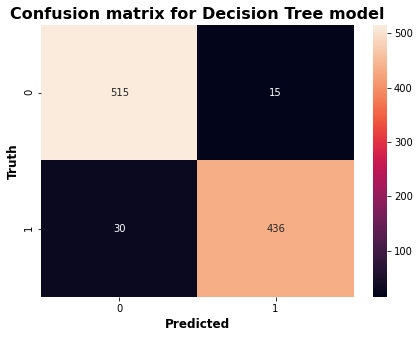

In [ ]:
y_pred_dt = best_estimator.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_dt))
print("f1_score:", metrics.f1_score(y_test, y_pred_dt))
print("recall_score:", metrics.recall_score(y_test, y_pred_dt))

cm_DT = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize = (7,5))
sn.heatmap(cm_DT, annot = True, fmt = 'd')
plt.title('Confusion matrix for Decision Tree model', fontweight = 'bold', fontsize = 16)
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

## Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(x_train, y_train)
  
# print prediction results
y_pred_rf = rf_classifier.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       530
           1       0.97      0.94      0.95       466

    accuracy                           0.96       996
   macro avg       0.96      0.96      0.96       996
weighted avg       0.96      0.96      0.96       996



In [ ]:
parameters = {'max_depth': [10], 'n_estimators': [40, 50, 70, 80, 100, 120, 150, 170, 200]}
scoring = ['accuracy']

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=parameters, scoring=scoring, refit='accuracy', cv=10, n_jobs=-1, verbose=10)

grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("BEST Training Accuracy Random Forest : {:.2f} %".format(best_accuracy*100))
print("BEST Training params for Random Forest : ", best_params)
print("BEST Training estimator for Random Forest : ", best_estimator)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   22.7s


BEST Training Accuracy Random Forest : 95.41 %
BEST Training params for Random Forest :  {'max_depth': 10, 'n_estimators': 50}
BEST Training estimator for Random Forest :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   27.1s finished


Accuracy: 0.9578313253012049
f1_score: 0.953020134228188
recall_score: 0.9141630901287554


Text(42.0, 0.5, 'Truth')

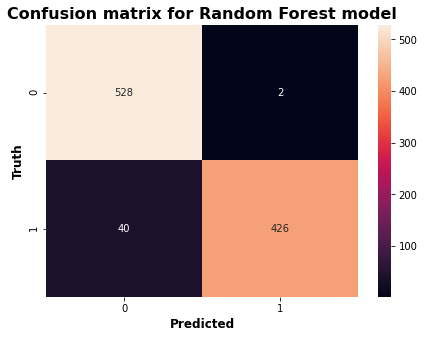

In [ ]:
y_pred_rf = best_estimator.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))
print("f1_score:", metrics.f1_score(y_test, y_pred_rf))
print("recall_score:", metrics.recall_score(y_test, y_pred_rf))

cm_DT = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize = (7,5))
sn.heatmap(cm_DT, annot = True, fmt = 'd')
plt.title('Confusion matrix for Random Forest model', fontweight = 'bold', fontsize = 16)
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

## Support Vector Machine

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)

# print prediction results
y_pred_svm = svc.predict(x_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       530
           1       0.94      0.86      0.90       466

    accuracy                           0.91       996
   macro avg       0.91      0.91      0.91       996
weighted avg       0.91      0.91      0.91       996



In [ ]:
parameters = {'C': [20, 22, 24, 26, 28, 30, 32, 34, 36], 
              'gamma': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.01, 0.001, 0.0001],
              'kernel': ['sigmoid', 'rbf']} 
scoring = ['accuracy']

grid_search = GridSearchCV(estimator = svc, param_grid = parameters, verbose=10,  
                           scoring = scoring, refit='accuracy', cv = 10, n_jobs = 1)

grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("BEST Training Accuracy SVM : {:.2f} %".format(best_accuracy*100))
print("BEST Training params for SVM : ", best_params)
print("BEST Training estimator for SVM : ", best_estimator)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV] C=20, gamma=0.2, kernel=sigmoid .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=20, gamma=0.2, kernel=sigmoid, accuracy=0.549, total=   0.2s
[CV] C=20, gamma=0.2, kernel=sigmoid .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .. C=20, gamma=0.2, kernel=sigmoid, accuracy=0.551, total=   0.2s
[CV] C=20, gamma=0.2, kernel=sigmoid .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .. C=20, gamma=0.2, kernel=sigmoid, accuracy=0.551, total=   0.2s
[CV] C=20, gamma=0.2, kernel=sigmoid .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV] .. C=20, gamma=0.2, kernel=sigmoid, accuracy=0.546, total=   0.2s
[CV] C=20, gamma=0.2, kernel=sigmoid .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV] .. C=20, gamma=0.2, kernel=sigmoid, accuracy=0.553, total=   0.3s
[CV] C=20, gamma=0.2, kernel=sigmoid .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s


[CV] .. C=20, gamma=0.2, kernel=sigmoid, accuracy=0.550, total=   0.2s
[CV] C=20, gamma=0.2, kernel=sigmoid .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.5s remaining:    0.0s


[CV] .. C=20, gamma=0.2, kernel=sigmoid, accuracy=0.550, total=   0.2s
[CV] C=20, gamma=0.2, kernel=sigmoid .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.8s remaining:    0.0s


[CV] .. C=20, gamma=0.2, kernel=sigmoid, accuracy=0.553, total=   0.3s
[CV] C=20, gamma=0.2, kernel=sigmoid .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.0s remaining:    0.0s


[CV] .. C=20, gamma=0.2, kernel=sigmoid, accuracy=0.553, total=   0.3s
[CV] C=20, gamma=0.2, kernel=sigmoid .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.3s remaining:    0.0s


[CV] .. C=20, gamma=0.2, kernel=sigmoid, accuracy=0.550, total=   0.2s
[CV] C=20, gamma=0.2, kernel=rbf .....................................
[CV] ...... C=20, gamma=0.2, kernel=rbf, accuracy=0.942, total=   0.3s
[CV] C=20, gamma=0.2, kernel=rbf .....................................
[CV] ...... C=20, gamma=0.2, kernel=rbf, accuracy=0.965, total=   0.2s
[CV] C=20, gamma=0.2, kernel=rbf .....................................
[CV] ...... C=20, gamma=0.2, kernel=rbf, accuracy=0.957, total=   0.2s
[CV] C=20, gamma=0.2, kernel=rbf .....................................
[CV] ...... C=20, gamma=0.2, kernel=rbf, accuracy=0.962, total=   0.2s
[CV] C=20, gamma=0.2, kernel=rbf .....................................
[CV] ...... C=20, gamma=0.2, kernel=rbf, accuracy=0.950, total=   0.2s
[CV] C=20, gamma=0.2, kernel=rbf .....................................
[CV] ...... C=20, gamma=0.2, kernel=rbf, accuracy=0.962, total=   0.3s
[CV] C=20, gamma=0.2, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  8.8min finished


BEST Training Accuracy SVM : 95.36 %
BEST Training params for SVM :  {'C': 20, 'gamma': 0.2, 'kernel': 'rbf'}
BEST Training estimator for SVM :  SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy: 0.9518072289156626
f1_score: 0.9467849223946785
recall_score: 0.9163090128755365


Text(42.0, 0.5, 'Truth')

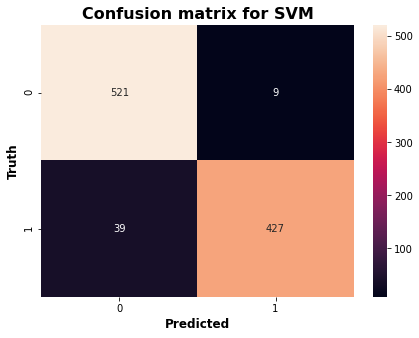

In [ ]:
y_pred_svm = best_estimator.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))
print("f1_score:", metrics.f1_score(y_test, y_pred_svm))
print("recall_score:", metrics.recall_score(y_test, y_pred_svm))

cm_DT = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize = (7,5))
sn.heatmap(cm_DT, annot = True, fmt = 'd')
plt.title('Confusion matrix for SVM', fontweight = 'bold', fontsize = 16)
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

## Neural Network

In [ ]:
X_train, X_validation, Y_train, y_validation = train_test_split(X_train, Y_train, test_size=0.2)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation, y_validation, test_size=0.5)

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import regularizers

ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=24, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
ann.add(keras.layers.Dropout(0.1))

ann.add(tf.keras.layers.Dense(units=32, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
ann.add(keras.layers.Dropout(0.3))

ann.add(tf.keras.layers.Dense(units=48, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
ann.add(keras.layers.Dropout(0.1))

ann.add(tf.keras.layers.Dense(units=32, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
ann.add(keras.layers.Dropout(0.1))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #probability of getting 

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#ann.summary()
# train model
X_train = X_train.astype(np.float64)
Y_train = Y_train.astype(np.float64)
X_validation = X_validation.astype(np.float64)
y_validation = y_validation.astype(np.float64)
X_test = X_test.astype(np.float64)
Y_test = Y_test.astype(np.float64)

In [ ]:
history = ann.fit(X_train, Y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=300)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 2.5461 - accuracy: 0.5154 - val_loss: 0.6574 - val_accuracy: 0.5451
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.8633 - accuracy: 0.5394 - val_loss: 0.6157 - val_accuracy: 0.5922
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.7874 - accuracy: 0.5438 - val_loss: 0.6306 - val_accuracy: 0.5882
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.6044 - val_loss: 0.6070 - val_accuracy: 0.6039
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6084 - val_loss: 0.5839 - val_accuracy: 0.8314
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6029 - val_loss: 0.5613 - val_accuracy: 0.8706
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.5920 - val_loss: 0.5485 - val_accuracy: 0.7961
Epoch 8/300
6

In [ ]:
Y_pred = ann.predict(X_test)
Y_pred = (Y_pred>0.5) #since we are working on probability
np.concatenate((Y_pred.reshape(len(Y_pred),1), np.array(y_test).reshape(len(np.array(y_test)),1)),1)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.

In [ ]:
Y_true = np.array(y_test)
cm_ANN = confusion_matrix(Y_true, Y_pred)

print("Accuracy:", metrics.accuracy_score(Y_true, Y_pred))
print("f1_score:", metrics.f1_score(Y_true, Y_pred))
print("recall_score:", metrics.recall_score(Y_true, Y_pred))

Accuracy: 0.9176470588235294
f1_score: 0.874251497005988
recall_score: 0.8295454545454546


Text(42.0, 0.5, 'Truth')

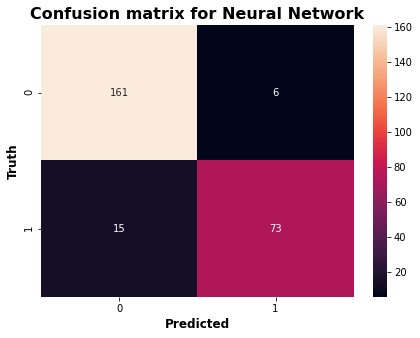

In [ ]:
plt.figure(figsize = (7,5))
sn.heatmap(cm_ANN, annot = True, fmt = 'd')
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.title('Confusion matrix for Neural Network', fontweight = 'bold', fontsize = 16)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

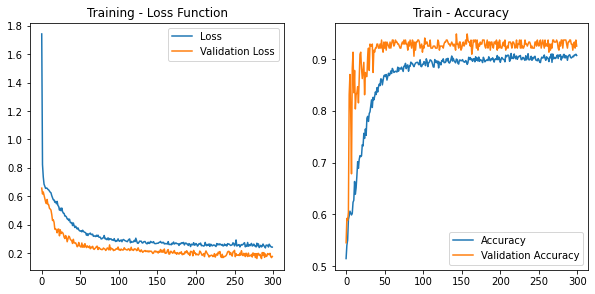

In [ ]:
def plot_history(history): # Training history of model
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Training - Loss Function')

    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Train - Accuracy')

    plt.show()

plot_history(history)